<a href="https://colab.research.google.com/github/frm1789/100DaysOfPython/blob/main/PCA_with_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PCA

Principal Component Analysis (**PCA**) is an **unsupervised** learning method that uses patterns present in high-dimensional data to reduce the complexity of the data while retaining most of the information.


## PCA with Iris dataset


## Objectives of the project

* Implement Principal Component Analysis (PCA) from scratch with NumPy and Python
* Conduct basic exploratory data analysis (EDA)
* Create simple data visualizations with Seaborn and Matplotlib

## 1) Load the data and libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [3]:

df= pd.read_csv("https://raw.githubusercontent.com/frm1789/100DaysOfPython/main/iris.data")   #importing dataset and making dataframe 
df.head()
     


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
df.columns =["sepal_lenght", "sepal_width", 'petal_lenght', 'petal_width', 'species']
df.dropna(how='all', inplace=True)
df.head()

,sepal_lenght,sepal_width,petal_lenght,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_lenght  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_lenght  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## Task 3: Visualize the data

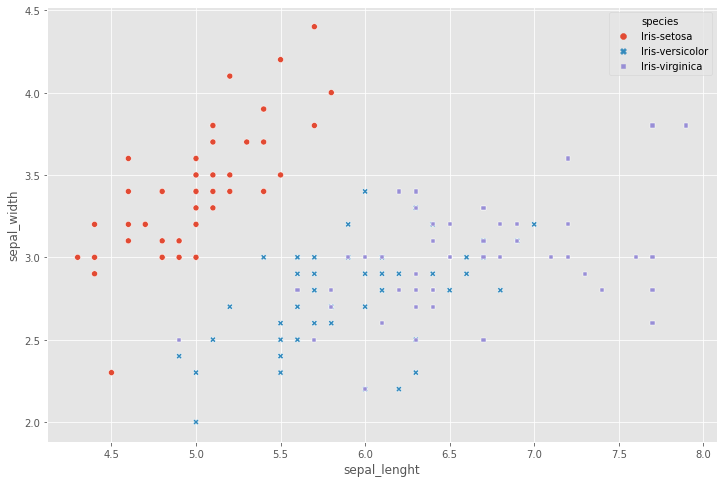

In [6]:
sns.scatterplot ( x = df.sepal_lenght, y = df.sepal_width, hue = df.species, style = df.species)

## Task 4: Standardize the Data

In [7]:
x = df.iloc[:, 0:4].values
y = df.species.values

In [8]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(x)

## Task 5: Compute the Eigenvectors and Eigenvalues

One of the applications of PCA is the reduction of dimensionality (variables), looking at the same time losing the least amount of information (variance) possible: when we have a large number of possibly correlated quantitative variables (indicative of the existence of redundant information), PCA allows us to reduce them to a smaller number of transformed variables (principal components) that explain much of the variability in the data

In [9]:
covarience_matrix = np.cov(X.T)
print("Covariance matrix: \n", covarience_matrix)


Covariance matrix: 
 [[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


## Task 6: Singular Value Decomposition (SVD)

Singular Value Decomposition (SVD) is a widely used technique to decompose a matrix into several component matrices, exposing many of the useful and interesting properties of the original matrix.



In [10]:
eigen_vec_svd, s, v = np.linalg.svd(X.T)
eigen_vec_svd

array([[-0.52308496, -0.36956962,  0.72154279,  0.26301409],
       [ 0.25956935, -0.92681168, -0.2411952 , -0.12437342],
       [-0.58184289, -0.01912775, -0.13962963, -0.80099722],
       [-0.56609604, -0.06381646, -0.63380158,  0.52321917]])

In [11]:
eigen_values, eigen_vectors = np.linalg.eig(covarience_matrix)

## Task 7: Selecting PC using the Explained Variance

Checking the value that each of the eigen values has, it is possible to determinate how much contribute to explain the variance.
The eigenvector with the highest eigenvalue is therefore the principal component.

In [12]:
for val in eigen_values:  
  print(val)

2.9244283691111117
0.9321523302535063
0.14946373489813355
0.020982592764270655


This calculation is telling us that 72% of the variance in our data is explained by the first principal component. The second component explains the 23% of the variance.

In [14]:
variance_explained = [(i/sum(eigen_values))*100 for i in eigen_values]
variance_explained

[72.62003332692032, 23.147406858644146, 3.7115155645845292, 0.5210442498510169]